In [9]:

import numpy as np
import datetime
import glob
import os
import matplotlib.pyplot as plt
import cartopy
from matplotlib import gridspec
import itertools
import cartopy.crs as ccrs
import tqdm
import netCDF4 as nc 
from scipy.stats import linregress
from pyproj import Proj, Transformer
from scipy.interpolate import griddata

import warnings
import pickle
warnings.filterwarnings("ignore")


In [10]:
# Load inverse SIT CS_IS_2p_LARM

inverseCSIS20182019 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201811/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201812/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201901/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201902/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201903/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                    '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201904/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy']

inverseCSIS20192020 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201911/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/201912/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202001/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202002/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202003/15tesselationDelaunay_initcell800_iteration3000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202004/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy']

inverseCSIS20202021 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202011/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202012/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202101/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202102/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202103/15tesselationDelaunay_initcell800_iteration2000000_date_window5j_error0.01_ice.npy',
                   '/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/results_npy/non_interpolated_input/202104/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy']

inverse_CSIS = [inverseCSIS20182019, inverseCSIS20192020, inverseCSIS20202021]


inverseCSAK20182019 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201811/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201812/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201901/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201902/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201903/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201904/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy']

inverseCSAK20192020 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201911/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/201912/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202001/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202002/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202003/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202004/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy']

inverseCSAK20202021 = ['/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202011/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202012/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202101/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202102/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202103/15tesselationDelaunay_initcell600_iteration1000000_window5j_error0.01_ice.npy',
                       '/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/results_npy/non_interpolated_input/202104/15tesselationDelaunay_initcell1500_iteration1500000_date_window15j_icedensitymixte_alphacs20.75_hierarchicalno_ice.npy']

inverse_CSAK = [inverseCSAK20182019, inverseCSAK20192020, inverseCSAK20202021]

In [11]:
def mask_observations(observations, inversion):
    new_inversion = np.copy(inversion)
    for i in range(len(observations)):
        for j in range(len(observations[0])):
            if np.isnan(observations[i][j]):
                new_inversion[i][j] = np.nan
    return new_inversion


In [12]:
# Données masqués pour comparer CS_IS et CS_AK
inverse_sit_CSIS_mask = []

for i in range(len(inverse_CSIS)):
    for j in range(len(inverseCSIS20182019)):
        ak = np.load(inverse_CSAK[i][j])
        csis = np.load(inverse_CSIS[i][j])

        csis = mask_observations(ak, csis)

        inverse_sit_CSIS_mask.append(np.nanmean(csis))

In [13]:
# Données AWI

awi_20182019 = ['/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2018/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201811-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2018/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201812-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201901-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201902-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201903-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201904-fv2p6.nc']

awi_20192020 = ['/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201911-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2019/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201912-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202001-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202002-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202003-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202004-fv2p6.nc']

awi_20202021 = ['/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202011-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2020/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202012-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2021/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202101-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2021/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202102-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2021/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202103-fv2p6.nc',
                    '/home/erb/masterproject/MSCI_project/validation_data/AWI/2.6_AWI_data/2021/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202104-fv2p6.nc']

awi= [awi_20182019, awi_20192020, awi_20202021]

awi_sit = []

for i in range(len(awi)):
    for j in range(len(awi_20182019)):
        sit = nc.Dataset(awi[i][j]).variables['sea_ice_thickness'][0][36:396,36:396][::-1, :]

        awi_sit.append(np.nanmean(sit))
    


In [14]:
awi_map_sit = []

for i in range(len(awi)):
    for j in range(len(awi_20182019)):
        awi_map_sit.append(nc.Dataset(awi[i][j]).variables['sea_ice_thickness'][0][36:396,36:396][::-1, :])

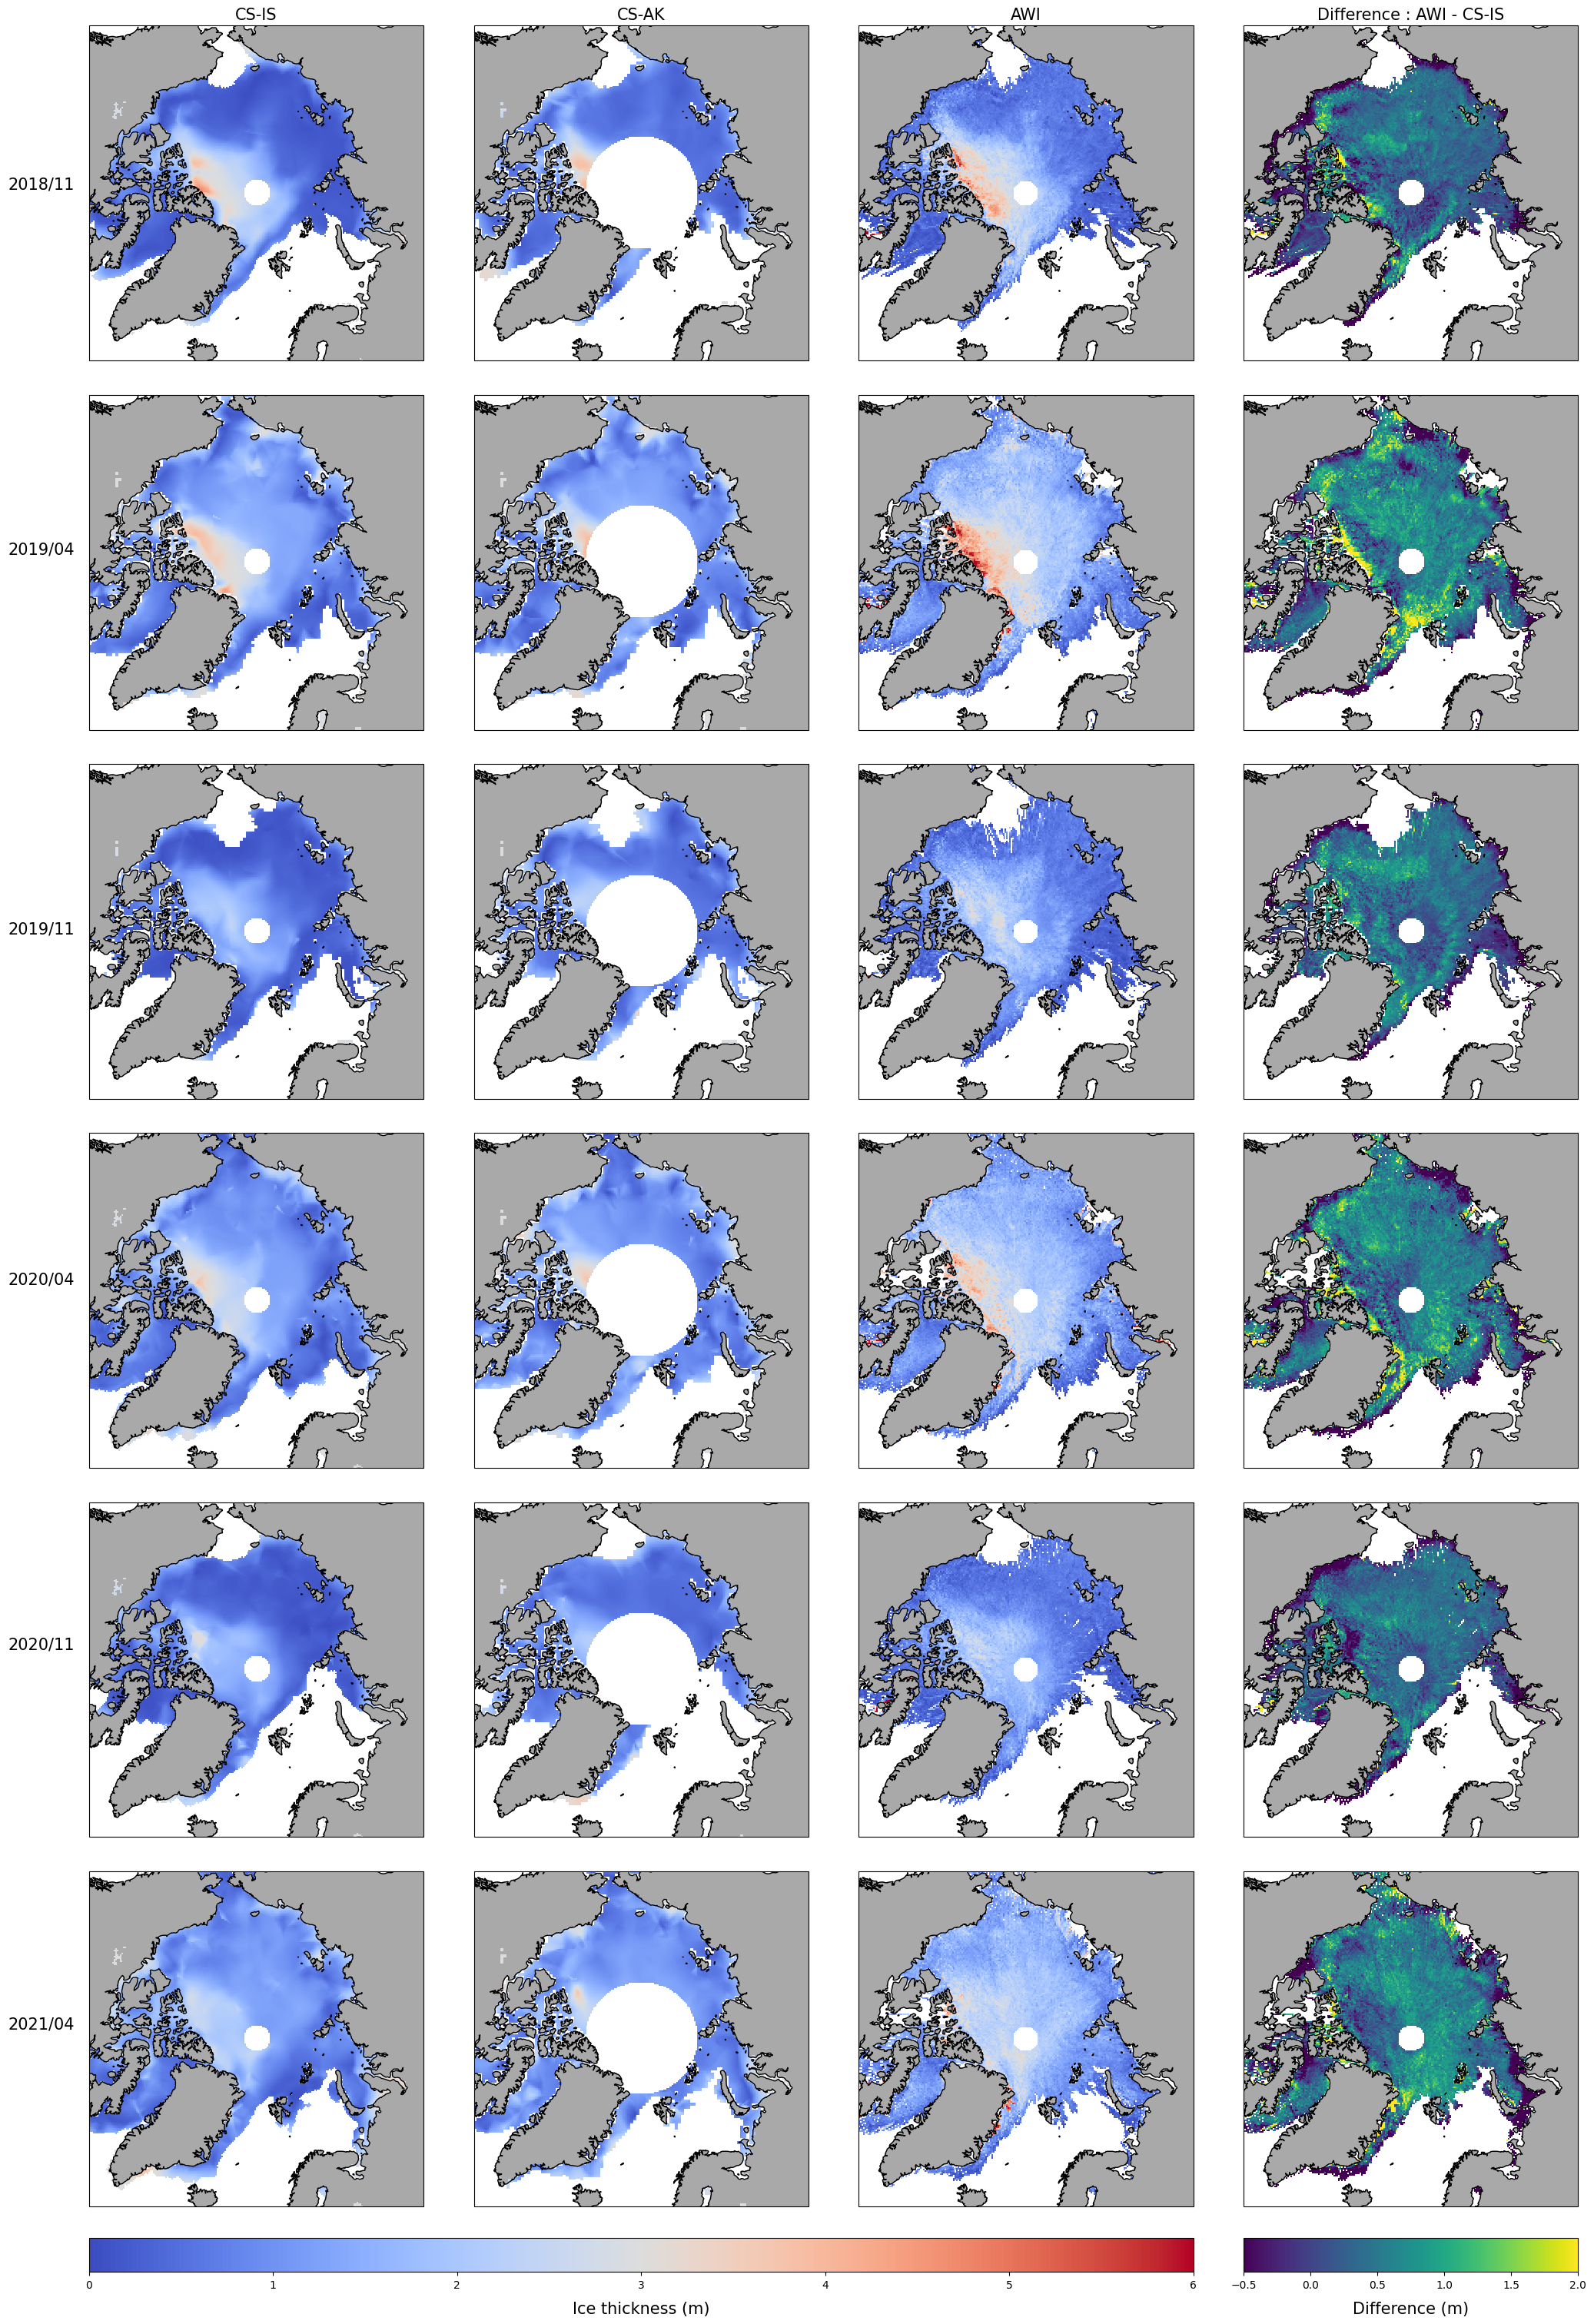

In [16]:
fig = plt.figure(figsize=(25,38))
spec = gridspec.GridSpec(ncols=4, nrows=7, hspace=0.1, wspace=0.15, height_ratios=[1,1,1, 1, 1, 1, 0.1])


months = ["November 2018", "April 2019", "November 2019", "April 2020", "November 2020", "April 2021"]
date = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")


inverse_map_CSIS = [np.load(inverseCSIS20182019[0]), np.load(inverseCSIS20182019[5]), np.load(inverseCSIS20192020[0]), 
                    np.load(inverseCSIS20192020[5]), np.load(inverseCSIS20202021[0]), np.load(inverseCSIS20202021[5])]


inverse_map_CSAK = [np.load(inverseCSAK20182019[0]), np.load(inverseCSAK20182019[5]), np.load(inverseCSAK20192020[0]), 
                    np.load(inverseCSAK20192020[5]), np.load(inverseCSAK20202021[0]), np.load(inverseCSAK20202021[5])]

awi_map      = [awi_map_sit[0], awi_map_sit[5], awi_map_sit[6], awi_map_sit[11],
                    awi_map_sit[12], awi_map_sit[17]]


for i in range(6):
    ax = fig.add_subplot(spec[i,0],projection=ccrs.NorthPolarStereo())

    if i == 0: 
        ax.set_title('CS-IS', fontsize = 15)
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.coastlines()  
    p_map = ax.pcolormesh(lon_g,lat_g, inverse_map_CSIS[i],cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 6)


    ax2 = fig.add_subplot(spec[i,1],projection=ccrs.NorthPolarStereo())
    if i == 0:
        ax2.set_title('CS-AK', fontsize = 15)
    ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax2.coastlines()  
    p_map = ax2.pcolormesh(lon_g,lat_g, inverse_map_CSAK[i],cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 6)

    ax3 = fig.add_subplot(spec[i,2], projection = ccrs.NorthPolarStereo())
    if i == 0:
        ax3.set_title('AWI', fontsize = 15)
    ax3.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax3.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax3.coastlines()  
    p_map = ax3.pcolormesh(lon_g,lat_g, awi_map[i] ,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 6)

    ax3 = fig.add_subplot(spec[i,3], projection = ccrs.NorthPolarStereo())
    if i == 0:
        ax3.set_title('Difference : AWI - CS-IS', fontsize = 15)
    ax3.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax3.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax3.coastlines()  
    p_map_diff = ax3.pcolormesh(lon_g,lat_g, awi_map[i] - inverse_map_CSIS[i] ,cmap='viridis',alpha=1.0, transform=ccrs.PlateCarree(), vmin = -0.5, vmax = 2)


cax = fig.add_subplot(spec[24:27])
fig.colorbar(p_map, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Ice thickness (m)', labelpad = 10, fontsize = 15)
cax.xaxis.set_label_position('bottom')


cax = fig.add_subplot(spec[27])
fig.colorbar(p_map_diff, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('bottom')
cax.set_xlabel('Difference (m)', labelpad = 10, fontsize = 15)
cax.xaxis.set_label_position('bottom')


date = ["2018/11", "2019/04","2019/11", "2020/04", "2020/11", "2021/04"]

fig.text(0.1, 0.825, date[0], va='center', ha='center', fontsize=15)
fig.text(0.1, 0.7, date[1], va='center', ha='center', fontsize=15)
fig.text(0.1, 0.57, date[2], va='center', ha='center', fontsize=15)
fig.text(0.1, 0.45, date[3], va='center', ha='center', fontsize=15)
fig.text(0.1, 0.325, date[4], va='center', ha='center', fontsize=15)
fig.text(0.1, 0.195, date[5], va='center', ha='center', fontsize=15)

save_fig = 1
if save_fig == 1 :
    plt.savefig('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/figures/timeseries_awi.png', dpi = 300)

